In [28]:
import os
import multiprocessing
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
import string
import re
from nltk.corpus import stopwords
from autocorrect import Speller
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize,word_tokenize
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from string import digits
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download("words")
# nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/serdar/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
def get_files(path):
    return os.listdir(path)

In [3]:
def clean(word):
    word2 = word.translate(re.sub(r'\d+', '', word).maketrans('', '', string.punctuation)).lower()
    remove_digits = str.maketrans('', '', digits)
    return word2.translate(remove_digits)

In [4]:

delete_words = set(nltk.corpus.words.words())

def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in delete_words or not w.isalpha())

In [5]:
def isValid(word):
    if len(word) == 2 and word[1] == 'a':
        return False
    return True

In [6]:
spell = Speller(lang='en')
def clear_document(sentences):
    new_words = ''
    lemmatizer = WordNetLemmatizer()
    for sentence in sentences:
        new_words += sentence.strip()
    new_words = clean(new_words)# regexp stemmer
    tokinezed = word_tokenize(new_words) #tokenization
    correct_sentence = [spell(i) for i in tokinezed]
    correct_sentence = [lemmatizer.lemmatize(i) for i in correct_sentence] #lemmatization
    stops = stopwords.words('english') #stop word removal
    filtered_words = list(map(clean_sent, correct_sentence))
    filtered_words = [word for word in filtered_words if word not in stops and isValid(word)]
    return ' '.join(filtered_words)

assum


In [23]:
path_list = ['review_polarity/txt_sentoken/pos/', 'review_polarity/txt_sentoken/neg/']
path_list_2 = ['cleaned/pos/', 'cleaned/neg/']
all_documents = []
sentiments = []
for i in range(2):
    path = path_list[i]
    path_2 = path_list_2[i]
    files = get_files(path)
    for file in files:
        with open(path+file) as f:
            words = f.readlines()
        cleaned_document = clear_document(words)
        with open(path_2+file,"w") as f:
            f.write(cleaned_document)
        all_documents.append(cleaned_document)
        sentiments.append(path[-4:-1])





In [31]:
def clear3(fileName):
    with open(fileName[0]) as f:
        words = f.readlines()
        cleaned_document = clear_document(words)
    with open(fileName[1],"w") as f:
        f.write(cleaned_document)

In [33]:
path_list = ['review_polarity/txt_sentoken/pos/', 'review_polarity/txt_sentoken/neg/']
path_list_2 = ['cleaned/pos/', 'cleaned/neg/']
for i in range(2):
    path = path_list[i]
    path_2 = path_list_2[i]
    files = get_files(path)
    filenames = [(path + file, path_2+file) for file in files]
    with multiprocessing.Pool(20) as p:
        # Use the pool to read all the files in parallel
        p.map(clear3, filenames)

In [7]:
def clear_document2(sentence):
    stops = stopwords.words('english') #stop word removal
    stop_words = [word.replace("'", '') for word in stops]
    filtered_words = list(map(clean_sent, sentence.split(' ')))
    filtered_words = [word for word in filtered_words if word not in stop_words and isValid(word)]
    while(True):
        if '' in filtered_words:
            filtered_words.remove('')
        else:
            break
    return ' '.join(filtered_words)

In [9]:
path_list_2 = ['cleaned/pos/', 'cleaned/neg/']
all_documents = []
sentiments = []
for i in range(2):
    path_2 = path_list_2[i]
    files = get_files(path_2)
    for file in files:
        with open(path_2+file) as f:
            sentence = f.readline()
        cleaned_document = clear_document2(sentence)
        all_documents.append(cleaned_document)
        # sentiments.append(path[-4:-1])
        # with open(path_2+file,"w") as f:
        #     f.write(cleaned_document)
        

In [10]:
df = pd.DataFrame(columns=['text'], data=all_documents)

In [11]:
df['number_of_words'] = df['text'].apply(lambda x : len(TextBlob(str(x)).words))
df['polarity'] = df['text'].apply(lambda x : TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x : TextBlob(str(x)).sentiment.subjectivity)
df['number_of_letters'] = df['text'].apply(lambda x: sum([len(i) for i in x.split(' ')]))

In [162]:
df

,text,number_of_words,polarity,subjectivity,number_of_letters
0,assume nothing phrase perhaps one used first i...,367,0.188718,0.652787,2021
1,plot male model also dumb impressionable reaso...,271,0.028215,0.561663,1548
2,actually fan original flick name starring mill...,692,0.201137,0.539895,3926
3,movie thats highly built human show review boa...,176,0.064375,0.360104,957
4,good hunting two movie one independent take st...,142,0.183685,0.507136,929
...,...,...,...,...,...
1995,synopsis meteorite grassland desert community ...,134,0.116035,0.550577,873
1996,anniversary slaying love best friend still bes...,240,0.153125,0.637616,1391
1997,popularity movie deal anything related serial ...,146,-0.005556,0.461111,895
1998,highflying hong style made way classic pretty ...,203,-0.059707,0.466251,1182


In [12]:
bag_of_words_model = CountVectorizer(max_features=10)

In [21]:
bag_of_word_df = pd.DataFrame(bag_of_words_model.fit_transform(all_documents).todense())
bag_of_word_df.columns = sorted(bag_of_words_model.vocabulary_)
bag_of_word_df.head()

,character,even,film,get,like,make,movie,one,scene,time
0,6,0,2,1,0,2,1,6,2,1
1,2,1,6,2,2,1,4,1,1,2
2,1,4,18,1,5,5,4,12,4,5
3,1,0,4,1,0,1,6,0,0,0
4,1,0,2,0,2,1,1,1,0,0


In [168]:
tfidf_model = TfidfVectorizer(max_features=10)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(all_documents).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,character,even,film,get,like,make,movie,one,scene,time
0,0.682834,0.000000,0.188699,0.120686,0.000000,0.242018,0.101774,0.576149,0.262804,0.116713
1,0.261872,0.140726,0.651307,0.277704,0.253687,0.139224,0.468372,0.110479,0.151181,0.268562
2,0.046729,0.200892,0.697324,0.049554,0.226342,0.248434,0.167155,0.473138,0.215817,0.239614
3,0.152424,0.000000,0.505461,0.161638,0.000000,0.162072,0.817852,0.000000,0.000000,0.000000
4,0.313954,0.000000,0.520562,0.000000,0.608282,0.333827,0.280762,0.264903,0.000000,0.000000


['action', 'actor', 'also', 'bad', 'best', 'character', 'come', 'could', 'director', 'doe', 'end', 'even', 'film', 'first', 'get', 'go', 'good', 'know', 'life', 'like', 'little', 'look', 'love', 'make', 'man', 'many', 'movie', 'much', 'never', 'new', 'one', 'people', 'performance', 'play', 'plot', 'really', 'role', 'scene', 'see', 'show', 'story', 'take', 'thing', 'time', 'two', 'way', 'well', 'work', 'would', 'year']


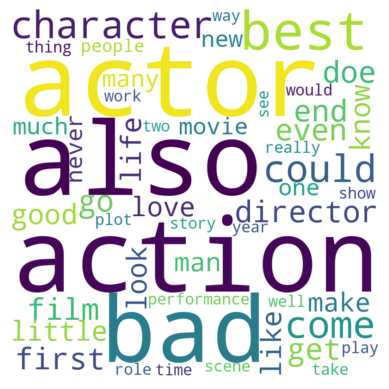

In [166]:
tfidf_model = TfidfVectorizer(max_features=50)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(all_documents).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
bests= list(tfidf_df.columns)
print(bests)
wordcloud = WordCloud(width = 800, height = 800, 
    background_color ='white', 
    max_words=200,
    stopwords = [],
    min_font_size = 10).generate(' '.join(bests))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
list(bag_of_word_df.columns)

['character',
 'even',
 'film',
 'get',
 'like',
 'make',
 'movie',
 'one',
 'scene',
 'time']

In [170]:
help(tfidf_model.fit_transform(all_documents).todense)

Help on method todense in module scipy.sparse._base:

todense(order=None, out=None) method of scipy.sparse._csr.csr_matrix instance
    Return a dense matrix representation of this matrix.
    
    Parameters
    ----------
    order : {'C', 'F'}, optional
        Whether to store multi-dimensional data in C (row-major)
        or Fortran (column-major) order in memory. The default
        is 'None', which provides no ordering guarantees.
        Cannot be specified in conjunction with the `out`
        argument.
    
    out : ndarray, 2-D, optional
        If specified, uses this array (or `numpy.matrix`) as the
        output buffer instead of allocating a new array to
        return. The provided array must have the same shape and
        dtype as the sparse matrix on which you are calling the
        method.
    
    Returns
    -------
    arr : numpy.matrix, 2-D
        A NumPy matrix object with the same shape and containing
        the same data represented by the sparse matri